In [2]:
import json
import gzip
import pandas as pd
import numpy as np 
import tensorflow as tf 
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import sparse_categorical_crossentropy
import matplotlib.pyplot as plt
import tensorflow_text as text
import tensorflow_hub as hub
from sklearn.manifold import TSNE


In [3]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1",
    trainable=False)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]
sequence_output = outputs["sequence_output"]

In [12]:
embedding_model=keras.Model(text_input,[pooled_output])
text=["good","awesome","amazing","great","splendid","positive","outstanding","excellent","bad","horrible","horrific","worse","awful","terrible","dreadful","unpleasant"]
embedded_text=embedding_model(tf.constant(text))
print(embedded_text)
labels=[0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]


tf.Tensor(
[[ 0.9509292   0.06534559  0.05944916 ...  0.2847136  -0.47050074
  -0.5845698 ]
 [ 0.94488853  0.9177517   0.11420113 ...  0.1093506  -0.586231
  -0.4292441 ]
 [ 0.91807866  0.8398544   0.00253307 ...  0.40540853 -0.48965687
  -0.81586254]
 ...
 [ 0.93026423 -0.25731423 -0.01156225 ...  0.26943934 -0.3492674
  -0.08408081]
 [ 0.58511513 -0.6277065  -0.27538607 ...  0.3595359  -0.31644523
  -0.00960873]
 [ 0.9015763  -0.8446124  -0.35388446 ...  0.33053666 -0.52321655
  -0.30500978]], shape=(16, 512), dtype=float32)


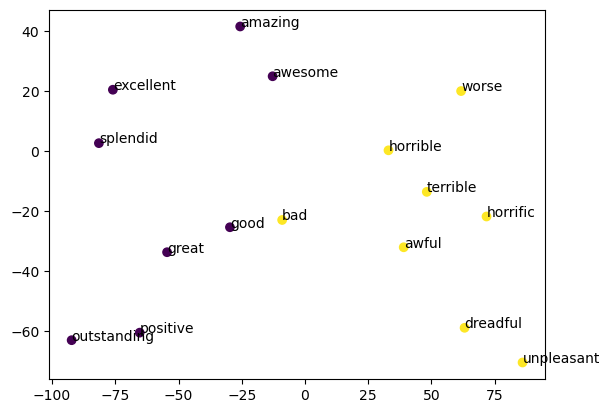

In [20]:
tsne = TSNE(n_components=2,perplexity=5)
embeddings_tsne = tsne.fit_transform(embedded_text)
#plt.scatter(embeddings_tsne[:,0],embeddings_tsne[:,1],c=labels)
fig, ax = plt.subplots()
ax.scatter(embeddings_tsne[:,0],embeddings_tsne[:,1],c=labels)

for i, txt in enumerate(text):
    ax.annotate(txt, (embeddings_tsne[i][0],embeddings_tsne[i][1]))

plt.show()